In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('./src')

from plot import *
from matrix import *
from ordinate import *
import pickle
from transform import *
import matplotlib.pyplot as plt
import rdata

In [3]:
DATA_DIR = '/home/prichter/Documents/trophy/data'

The vegan package in R comes with an [example dataset called dune](https://www.rdocumentation.org/packages/vegan/versions/2.6-4/topics/dune), which contains a bunch of data for different plant species. These data are stored in the vegan GitHub repository as rda files, which can be read in a Python environment using the `rdata` Python package. This data has already been scaled and transformed, so requires minimal preprocessing.

The `rdata.read_rda` function call below reads in the dataset as a pandas `DataFrame` with taxonomy groups as columns and samples as row indices. 

In [4]:
dune_df = rdata.read_rda(f'{DATA_DIR}/dune.rda')['dune']
dune_metadata_df = rdata.read_rda(f'{DATA_DIR}/dune.env.rda')['dune.env'].rename(columns={c:c.lower() for c in ['A1', 'Moisture', 'Management', 'Use', 'Manure']})

In [5]:
dune_df.head()

,Achimill,Agrostol,Airaprae,Alopgeni,Anthodor,Bellpere,Bromhord,Chenalbu,Cirsarve,Comapalu,...,Ranuflam,Rumeacet,Sagiproc,Salirepe,Scorautu,Trifprat,Trifrepe,Vicilath,Bracruta,Callcusp
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,2.0,0.0,3.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0
3,0.0,4.0,0.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0
4,0.0,8.0,0.0,2.0,0.0,2.0,3.0,0.0,2.0,0.0,...,0.0,0.0,5.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0
5,2.0,0.0,0.0,0.0,4.0,2.0,2.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,3.0,2.0,2.0,0.0,2.0,0.0


In [9]:
# Load the dune data into an CountMatrix object. 
dune_M = CountMatrix().from_pandas(dune_df)

# Make sure there is a serial_code field in the metadata. 
dune_metadata_df['serial_code'] = dune_metadata_df.index
dune_M.metadata = dune_metadata_df

In [10]:
# # Slightly concerned by this, as I don't think there should be any empty columns.
# # Possibly because two samples are dropped in the setup.ipynb notebook: Dropping 192136 rows in the counts data which do not have associated metadata.
# ! python ./scripts/create.py '{DATA_DIR}/data.csv' 'asv_matrix.mtx' -l 'asv' -m '{DATA_DIR}/metadata.csv'

In [41]:
# Load the ASV matrix from the pickle file. Should already have the metadata stored. 
with open('asv_matrix.mtx', 'rb') as f:
    M = pickle.load(f)

# data = pd.read_csv(f'{DATA_DIR}/ASVs_counts_Mar2023.tsv', delimiter='\t', index_col=0)
# data = data.drop(columns=['HDK-DNAexNegLot169030916-30cyc', 'HDK22-KML-sand-dry','HDK22-KML-sand-wet', 'HDK-MAR-PCR-BLANK'])
# data = data.transpose()
# M = CountMatrix(level='asv').from_pandas(data)

n_components = 2 
model_bray_curtis = NonmetricMultidimensionalScaling(n_components=n_components, metric='bray-curtis', max_tries=200)
model_bray_curtis.fit(M)

Square root transformation applied.
Wisconsin double standardization applied.
Run 0 finished in 2 iterations. Stress: 0.2965475932907039
Run 1 finished in 94 iterations. Stress: 0.2526098777008169
Run 2 finished in 98 iterations. Stress: 0.10123929133439874
New best solution found. Procrustes RMSE: 0.05842528822960793 Procrustes max residual 0.30061319922010504.
Run 3 finished in 99 iterations. Stress: 0.1008357310434386
New best solution found. Procrustes RMSE: 0.0017710600661918483 Procrustes max residual 0.02014380671784799.
Run 4 finished in 115 iterations. Stress: 0.10122604639568085
Run 5 finished in 81 iterations. Stress: 0.23597089546884825
Run 6 finished in 127 iterations. Stress: 0.10104955288922862
Run 7 finished in 200 iterations. Stress: 0.15768124185635946
Run 8 finished in 84 iterations. Stress: 0.10056096731599266
New best solution found. Procrustes RMSE: 0.006287116555856787 Procrustes max residual 0.06908901181560101.
Run 9 finished in 8 iterations. Stress: 0.41263999

In [42]:
model_bray_curtis.stress

0.09965092519036045

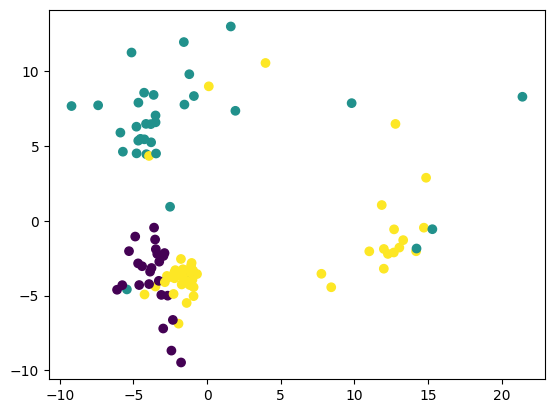

In [43]:
# model_bray_curtis.plot(colors=dune_M.get_metadata('management'))
model_bray_curtis.plot(colors=M.get_metadata('site'))


In [ ]:
model_bray_curtis.model.n_iter_

5